In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns

In [20]:
%store -r data_array_fc_ec_values
%store -r data_array_ec_values
%store -r data_array_fc_era_values
%store -r mean_era5_06_29
%store -r D_06_29_ec 
%store -r data_array_fc_era_values_cleaned
%store -r D_06_29_fcn_era 

%store -r data_array_fc_ec_values_cleaned
%store -r D_06_29_fc_ec  

In [6]:
np.shape(data_array_fc_ec_values)

(15, 51)

In [29]:
data_fc_era_06_15 = data_array_fc_era_values[0,:]
#data_fc_era_06_15

In [30]:
index = [6,16,26]
data_fc_era_06_15 = np.delete(data_fc_era_06_15, index)
#data_fc_era_06_15

In [58]:

data_fc_ec_06_15 = data_array_fc_ec_values[0,1:50]
data_fc_ec_06_16 = data_array_fc_ec_values[1,1:50]
data_fc_ec_06_17 = data_array_fc_ec_values[2,1:50]
data_fc_ec_06_18 = data_array_fc_ec_values[3,1:50]
data_fc_ec_06_19 = data_array_fc_ec_values[4,1:50]
data_fc_ec_06_20 = data_array_fc_ec_values[5,1:50]
data_fc_ec_06_21 = data_array_fc_ec_values[6,1:50]
data_fc_ec_06_22 = data_array_fc_ec_values[7,1:50]
data_fc_ec_06_23 = data_array_fc_ec_values[8,1:50]
data_fc_ec_06_24 = data_array_fc_ec_values[9,1:50]
data_fc_ec_06_25 = data_array_fc_ec_values[10,1:50]
data_fc_ec_06_26 = data_array_fc_ec_values[11,1:50]
data_fc_ec_06_27 = data_array_fc_ec_values[12,1:50]
data_fc_ec_06_28 = data_array_fc_ec_values[13,1:50]
data_fc_ec_06_29 = data_array_fc_ec_values[14,1:50]
#data_fc_ec_06_17

In [59]:
index = [29,45]
data_fc_ec_06_17 = np.delete(data_fc_ec_06_17, index)
#data_fc_ec_06_17

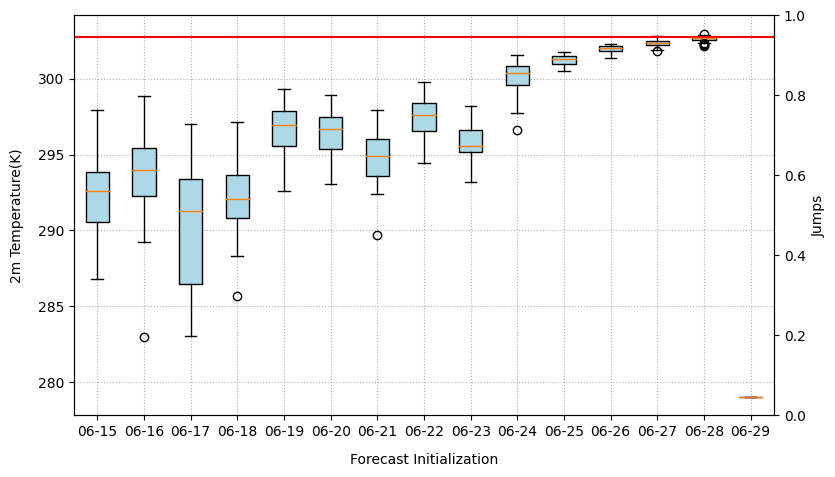

In [60]:
#ec
data = data_array_ec_values[3:14,:].T
#bp = plt.boxplot(data_array_fc_ec_values_trans,whis=[5, 95], showfliers= False)
#boxplot
c=['pink']
fig = plt.figure(figsize=(7,4))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])
ax.grid(True, linestyle='dotted')
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("2m Temperature(K)", labelpad=10)
ax2 = ax.twinx()
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]

#ax2.plot(x,D_06_29_ec, 'o-',color='green', label='Line Plot',linewidth = 0.5)
ax2.set_ylabel('Jumps', color='black')
#ax.plot(df, 'o', color='black',label='ECMWF')
x = [data_fc_ec_06_15,data_fc_ec_06_16,data_fc_ec_06_17,data_fc_ec_06_18,data_fc_ec_06_19,data_fc_ec_06_20,data_fc_ec_06_21,data_fc_ec_06_22,data_fc_ec_06_23,data_fc_ec_06_24
    ,data_fc_ec_06_25,data_fc_ec_06_26,data_fc_ec_06_27,data_fc_ec_06_28,data_fc_ec_06_29]
bp = ax.boxplot(x,boxprops=dict(facecolor='lightblue'),patch_artist=True)


ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],["06-15", "06-16", "06-17", "06-18", "06-19", "06-20", "06-21","06-22", "06-23", "06-24", "06-25", "06-26", "06-27","06-28", "06-29"],rotation=45)
plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_ensemble_box_ec_withjumps.png', bbox_inches='tight',dpi=100)


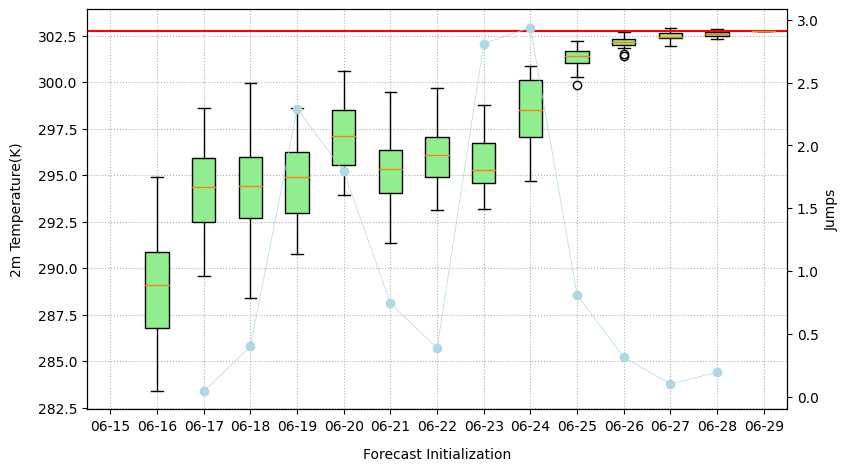

In [84]:
#fc_era
data = data_array_fc_era_values_cleaned.T
#bp = plt.boxplot(data_array_fc_ec_values_trans,whis=[5, 95], showfliers= False)
#boxplot
c=['pink']
fig = plt.figure(figsize=(7,4))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])
ax.grid(True, linestyle='dotted')
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("2m Temperature(K)", labelpad=10)
ax2 = ax.twinx()
x=[3,4,5,6,7,8,9,10,11,12,13,14]
ax2.plot(x,D_06_29_fcn_era[2:14], 'o-',color='lightblue', label='Line Plot',linewidth = 0.5)
ax2.set_ylabel('Jumps', color='black')
#ax.plot(df, 'o', color='black',label='ECMWF')
bp = ax.boxplot(data,boxprops=dict(facecolor='lightgreen'),patch_artist=True)


ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],["06-15","06-16", "06-17", "06-18", "06-19", "06-20", "06-21","06-22", "06-23", "06-24", "06-25", "06-26", "06-27","06-28", "06-29"],rotation=45)
plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_ensemble_box_fc_era_withjumps.png', bbox_inches='tight',dpi=100)


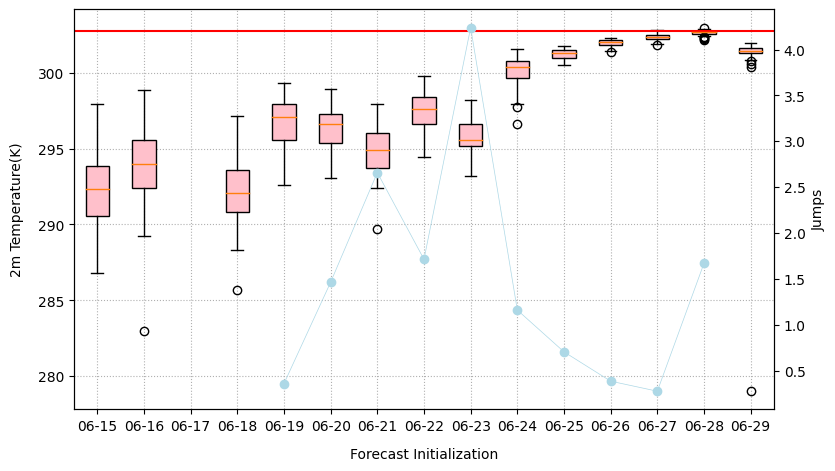

In [85]:
#fc_ec
data = data_array_fc_ec_values_cleaned.T
#bp = plt.boxplot(data_array_fc_ec_values_trans,whis=[5, 95], showfliers= False)
#boxplot
c=['pink']
fig = plt.figure(figsize=(7,4))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])
ax.grid(True, linestyle='dotted')
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("2m Temperature(K)", labelpad=10)
ax2 = ax.twinx()
x=[5,6,7,8,9,10,11,12,13,14]
ax2.plot(x,D_06_29_fc_ec[4:14], 'o-',color='lightblue', label='Line Plot',linewidth = 0.5)
ax2.set_ylabel('Jumps', color='black')
#ax.plot(df, 'o', color='black',label='ECMWF')
bp = ax.boxplot(data,boxprops=dict(facecolor='pink'),patch_artist=True)


ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],["06-15","06-16", "06-17", "06-18", "06-19", "06-20", "06-21","06-22", "06-23", "06-24", "06-25", "06-26", "06-27","06-28", "06-29"],rotation=45)
plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_ensemble_box_fc_ec_withjumps.png', bbox_inches='tight',dpi=100)